# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)
from pertussis import *
logger.setLevel(logging.INFO)
# plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('./dean_style.conf')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multiple Chain
## Load Models

In [93]:
save_vers = '1126-extra-data-rho-50-'
[save_mcmc(mc, './chains/' + save_vers) for mc in mcmcs[:] ]
# [save_mcmc(mc, './') for mc in mcmcs[1:] ]

['mcmc_v2_0', 'mcmc_v2_1', 'mcmc_v2_2', 'mcmc_v2_3']

./
mcmc_v2_0 - MLE: -20.60 at 5690 (of 17720)with values: 
 [ 3.144304088652  0.000937170422  0.000252930465  0.000068433777]
mcmc_v2_1 - MLE: -20.64 at 1535 (of 6351)with values: 
 [ 3.096195440987  0.000816995926  0.000269321191  0.000073358183]
mcmc_v2_2 - MLE: -20.59 at 4564 (of 5101)with values: 
 [ 3.203511622109  0.000894182187  0.000258205141  0.000071315462]
mcmc_v2_3 - MLE: -20.64 at 2284 (of 5101)with values: 
 [ 3.1569841676    0.000908490328  0.00026326058   0.000069909696]
(17720, 4)
[ 1063.864924855274  1166.503320328344  1064.514047431267  1262.137168725809]
50.0


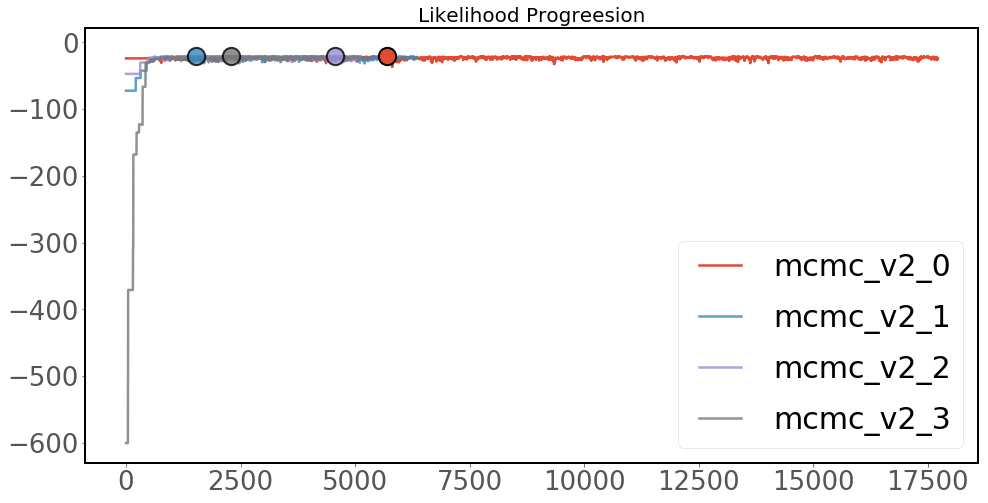

In [105]:
vers = 'chains/1106-rho-60-multi-sigma'
vers = ''
print ('./' + vers)
# mcmcs = [load_mcmc('./' + vers + 'mcmc_{}.pkl'.format(i)) for i in [0,1,2,3]]
mcmcs = [load_mcmc('./' + vers + 'mcmc_v2_{}.pkl'.format(i)) for i in [0,1,2,3]]
for mc in mcmcs:
    chain_tally(mc,0)
fig, ax = likelihood_progression_multi(mcmcs)
print (ess(mcmcs[0]))
print (mcmcs[0]['initial_guess'][2])
mcmc = mcmcs[0]

In [28]:
mcmc = mcmcs[0]

In [215]:
# lldiff = mcmcs[0]['ll'][-5000:,1] - mcmcs[1]['ll'][-5000:,1]
# fig, ax = plt.subplots()
# print (ax.get_xlim())
# density = kde(lldiff)
# xs = np.linspace(lldiff.min(), lldiff.max(), 100)
# ax.plot(xs, density(xs))
# ax.set_title("Distribution: $LL_{{chain0}} - LL_{{chain1}}$")

## Chains and Distributions

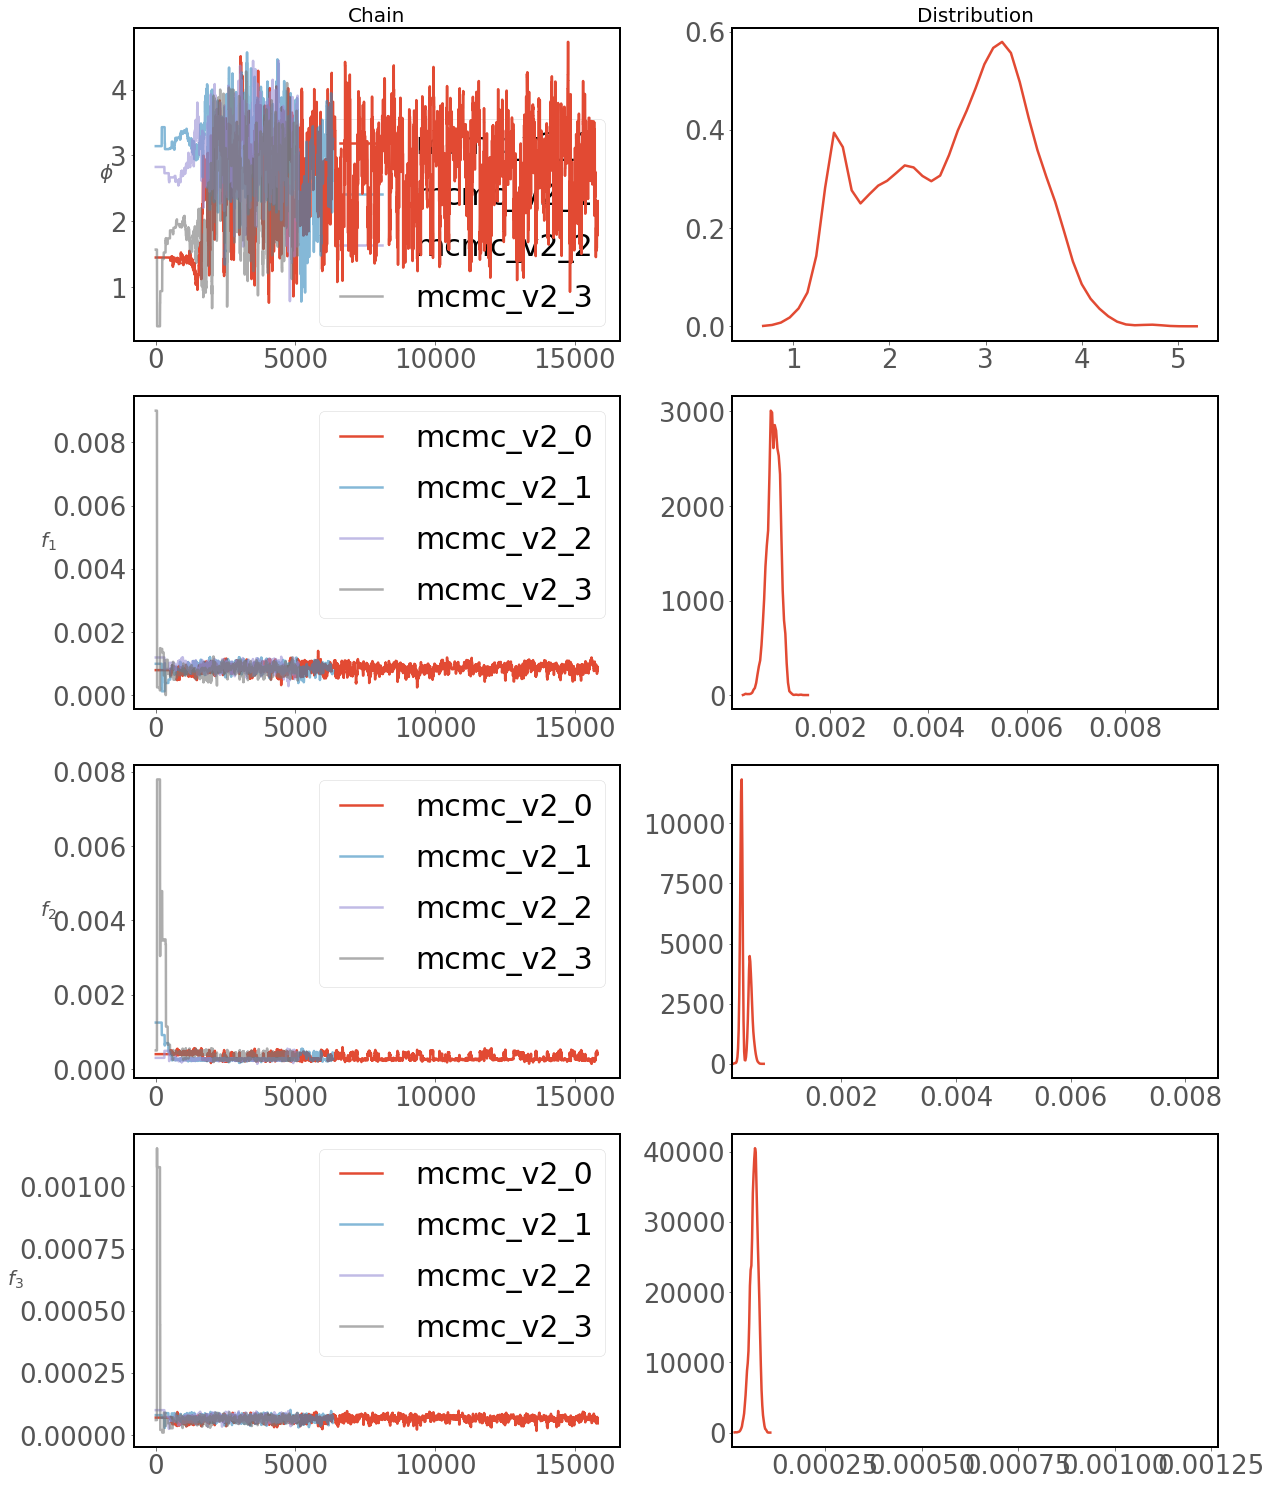

In [95]:
fig, axs = plot_chains(mcmcs[0], multi_chain = True, dists = False)
for mc in mcmcs[1:]:
    plot_chains(mc, fig = fig, multi_chain = True, dists = False)

# Single Chain

## Load Model

In [106]:
# Choose best model
active_max = max([mc['max_likelihood'] for mc in mcmcs if mc['active']])
mcmc = [mc for mc in mcmcs if mc['max_likelihood']==active_max][0]
print (mcmc['name'], mcmc['max_likelihood'])

mcmc_v2_0 -20.6027024666


In [107]:
chain_tally(mcmc, 10000)
save_mcmc(mcmc, './chains/1126-rho-50-best-')

'mcmc_v2_0'

mcmc_v2_0: 15820
['phi', 'f1', 'f2', 'f3']
Mean LL: -0.11953913937900819
MLE: -20.62 at 13772 with values: 
 [ 3.098019405165  0.000899987284  0.000256674994  0.000071635914]


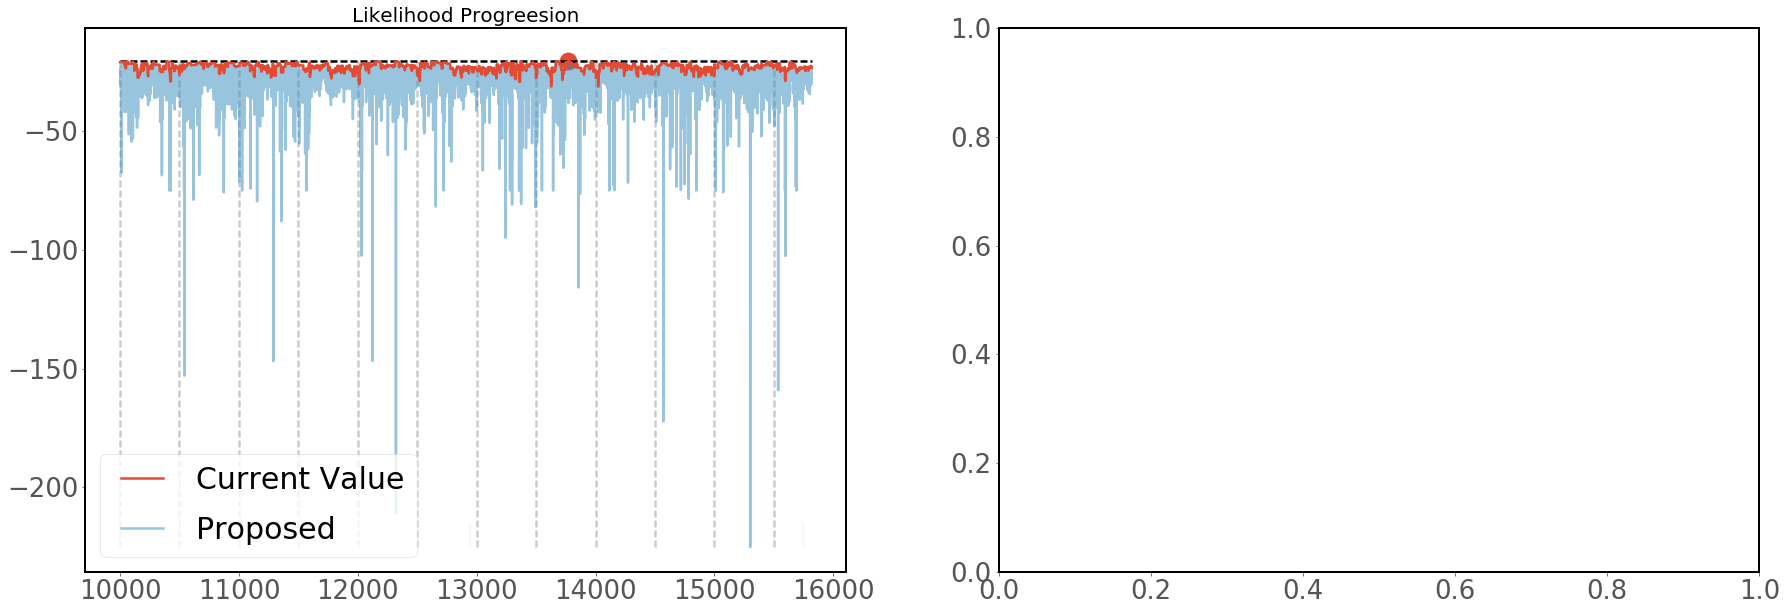

In [98]:
# Load
# mcmc = load_mcmc('./chains/mcmc_0.pkl')
# mcmc = load_mcmc('./mcmc_0.pkl')
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)
print ('{}: {}'.format(mcmc['name'], len(mcmc['chain'])))
names = [mcmc['names'][i] for i in mcmc['active_params']]
print(names)

# Distributions
dists = mcmc['dists']
# Times
r_start = mcmc['start']
r_end = mcmc['end']
step = 1 / N

# Data
data_M, months = mcmc['datay1'], mcmc['datax1']
state_0 = mcmc['state_0']

# Results
ll = chain_ll(mcmc)
print ("Mean LL: {}".format(ll.mean(axis=0)[0] / len(mcmc['datax1'])))

#PLOT
fig, axs = plt.subplots(1,2,figsize=(30,10))
likelihood_progression(mcmc, ax=axs[0])
# likelihood_progression(mcmc, zoom=40, ax=axs[1])
plt.show()

In [139]:
ll.mean(axis=0)

array([-24.217738829232,             -inf])

## Summary
difference between LL for following runs

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


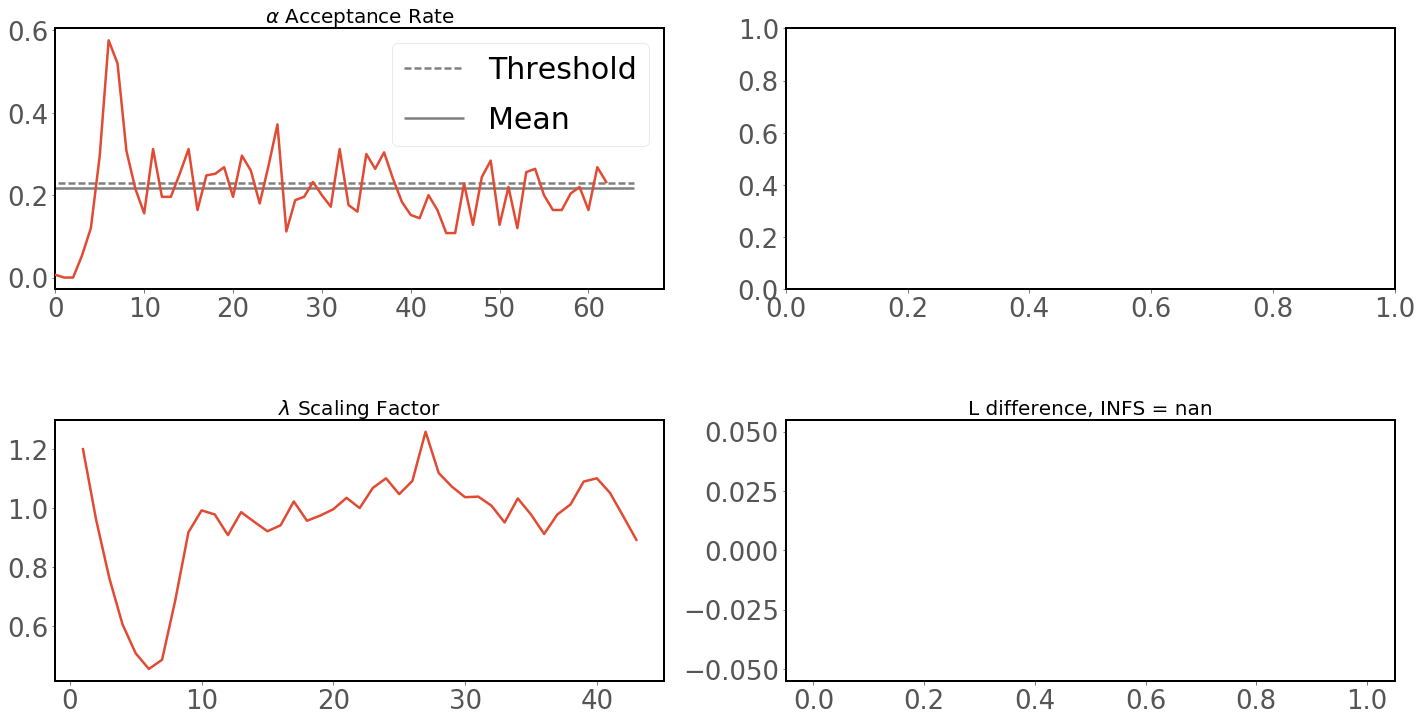

In [99]:
chain_summary(mcmc)

## Traces
### Chains

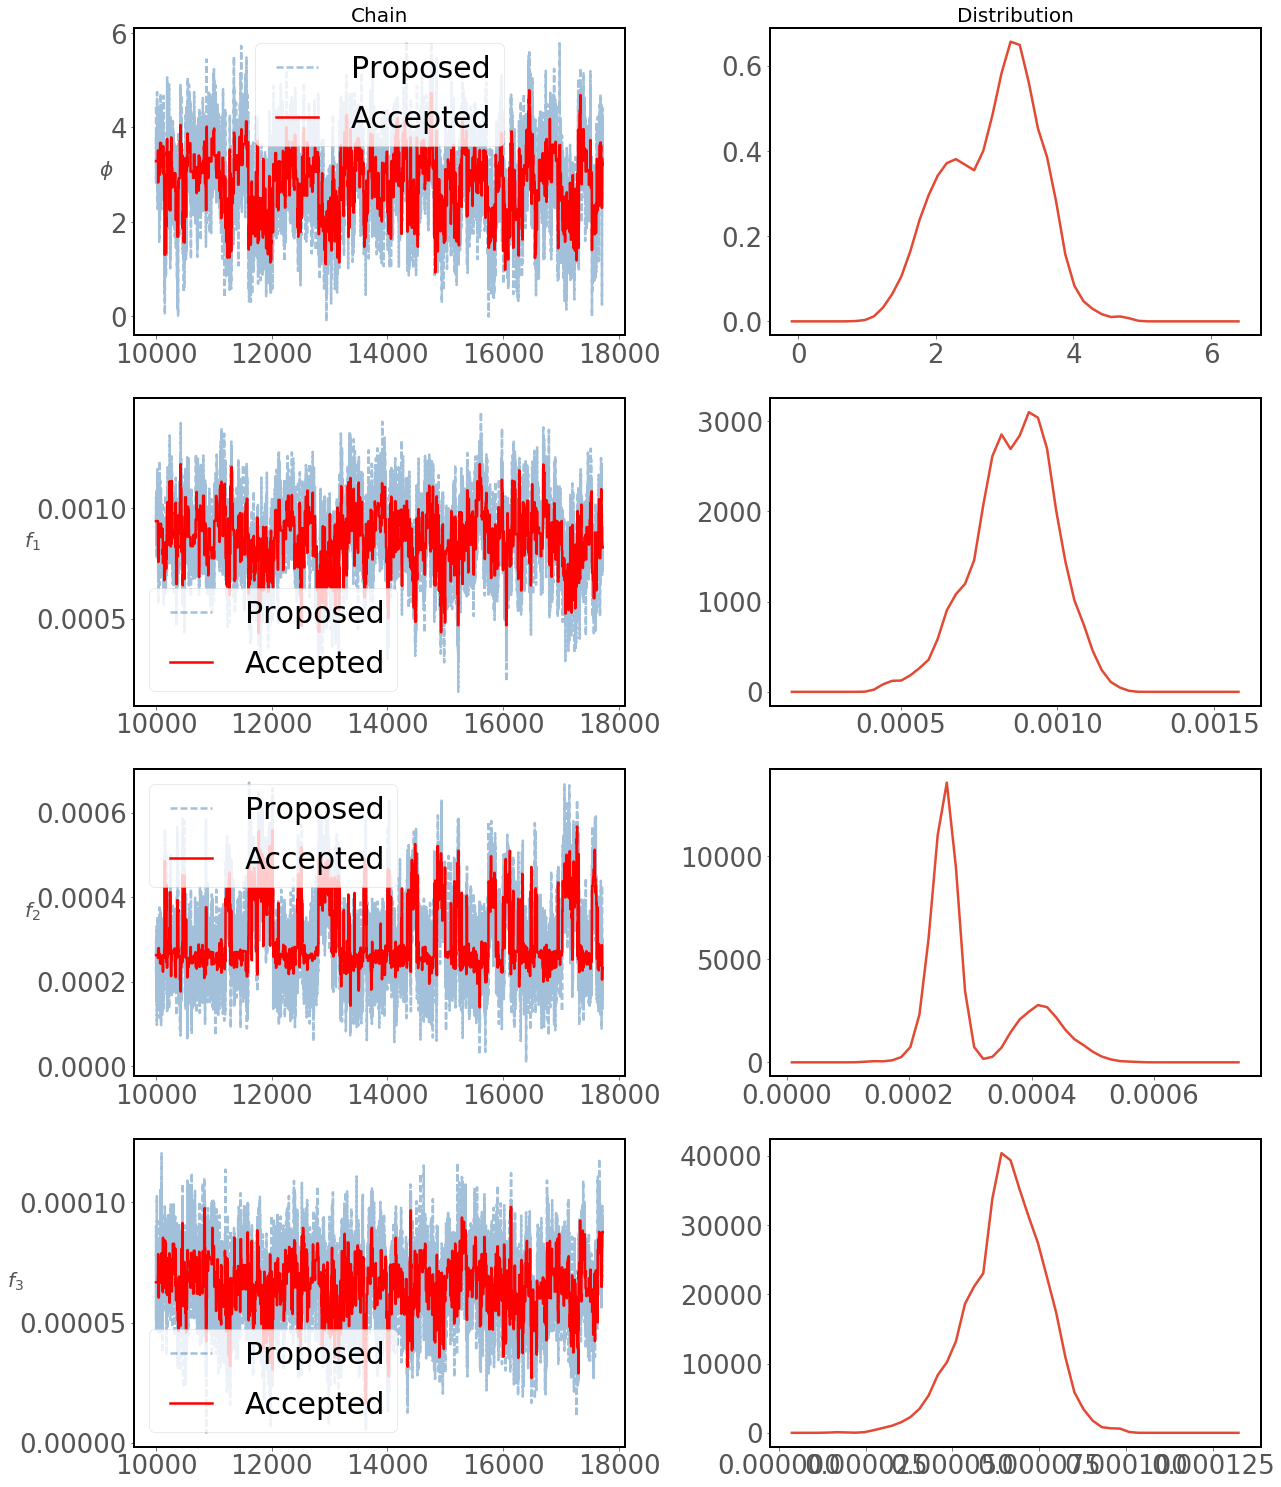

In [108]:
plot_chains(mcmc)
plt.show()

## PPT

### Chains

In [34]:
[['$\Omega$','$\phi$',r'$\rho$','$f_1$','$f_2$','$f_3$'][i] for i in mcmc['active_params']]

['$\\phi$', '$f_1$', '$f_2$', '$f_3$']

In [217]:
mcmc['cov']

array([[ 0.050975744066,  0.000004778498, -0.000002210104, -0.000000171552],
       [ 0.000004778498,  0.000000009553, -0.000000001695, -0.000000000187],
       [-0.000002210104, -0.000000001695,  0.000000000624,  0.000000000034],
       [-0.000000171552, -0.000000000187,  0.000000000034,  0.000000000034]])

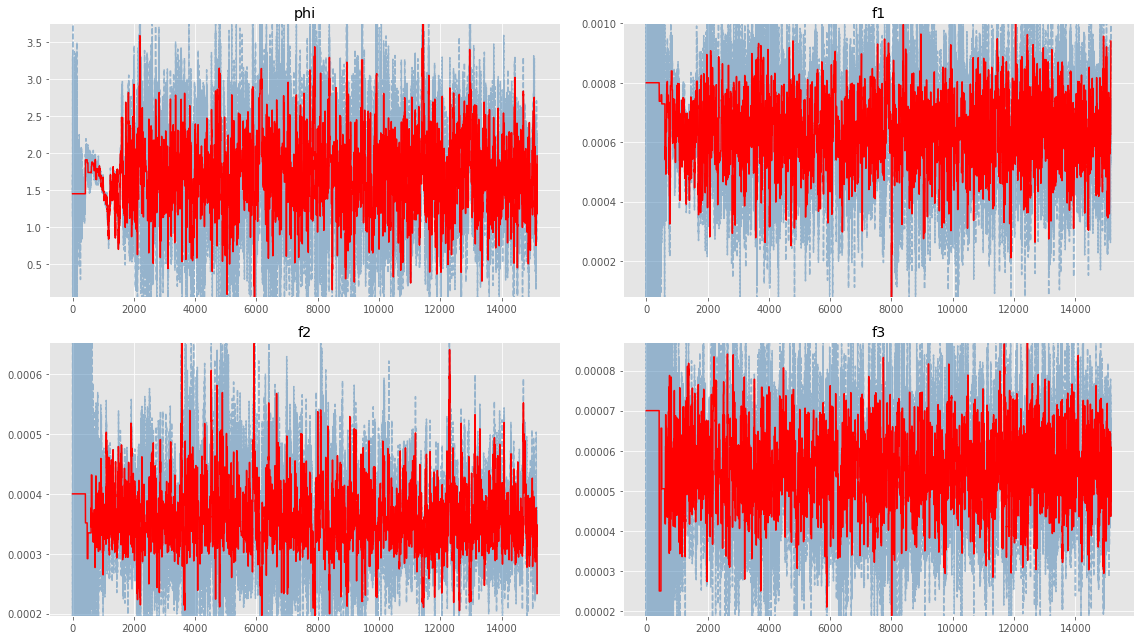

In [36]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs = np.concatenate(axs)
tally = 0#-12500
mcmc = mcmc
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
# names = ["omega", "phi", "rho", "f1"]#,"f2","f3","e"]
for i, name in enumerate(names):
    ch = chain[:,i]
#     print (ch)
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
    axs[i].plot(chain[:,i], color='red')#, label = 'chain {}'.format(j))

    axs[i].set_title(name)
    axs[i].set_ylim(a,b)
#     density = kde(chain[:,i])
#     xs = np.linspace(a,b,50)
#     axs[i,1].plot(xs,density(xs))
# ax = axs[-1]
# ax.imshow(cov_mat, cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
# ax.set_xticks([])
plt.tight_layout()
plt.show()

#### Distributions


[0 1 2 3]


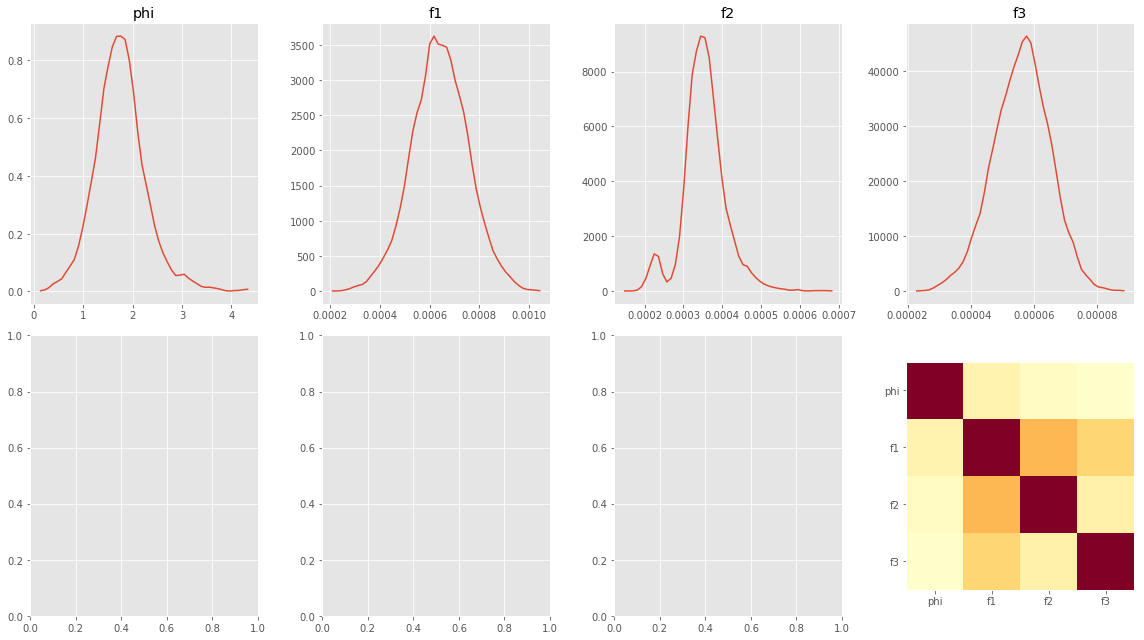

In [55]:
tally = mcmc['tally']
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
cov_mat = np.corrcoef(chain[-1000:,:].T,)
fig, axs = plt.subplots(2,4, figsize=(16,9))
axs = np.concatenate(axs)



for i, name in enumerate(names):
#     if i==2: continue
    ch = chain[:,i]
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].set_title(name)
    
    density = kde(chain[:,i])
    xs = np.linspace(a,b,50)
    axs[i].plot(xs,density(xs))
ax = axs[-1]
ax.imshow(np.abs(cov_mat), cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
ax.set_yticks(np.arange(4))
ax.set_xticks(np.arange(4))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
ax.grid(False)
print (ax.get_xticks())
plt.tight_layout()
plt.show()

In [56]:
cov_mat

array([[ 1.            , -0.11605531191 , -0.063501760602, -0.035261799575],
       [-0.11605531191 ,  1.            , -0.377450980749, -0.287279881055],
       [-0.063501760602, -0.377450980749,  1.            , -0.128681390376],
       [-0.035261799575, -0.287279881055, -0.128681390376,  1.            ]])

# PAPER

## A
Image of Model compartments

In [57]:
# Model

## B - MLE

In [109]:
plot_data = mcmc['datay1'].copy()
plot_data[mcmc['datay1'] > 150] = np.nan
plot_data2 = mcmc['datay2'].copy()
plot_data2[mcmc['datay2'] > 300] = np.nan
xdata = np.append(mcmc['datax1'],mcmc['datax2'])
ydata = np.append(plot_data, plot_data2)
# labels = ['0-1', '1-21', '21+']
thinnig = int(len(mcmc['chain'] - mcmc['tally']) // (ess(mcmc).mean()))
# thinnig = 1
sampled = mcmc['y_hat_M'][mcmc['tally']::thinnig,:,:].copy()
sampled2 = mcmc['y2_hat_M'][mcmc['tally']::thinnig,:].copy()
print (ess(mcmc))
print (len(sampled))


(7720, 4)
(7720, 4)
[ 501.745964536598  506.238905159081  472.961296364805  544.137588466192]
221


-20.6200528038 13772
[ 3.098019405165  0.000899987284  0.000256674994  0.000071635914]
[ 3.098019405165  0.000899987284  0.000256674994  0.000071635914]
[  3.9805           3.098019405165  50.               0.000899987284   0.000256674994   0.000071635914]
[ 3.098019405165  0.000899987284  0.000256674994  0.000071635914] -19.7905569345


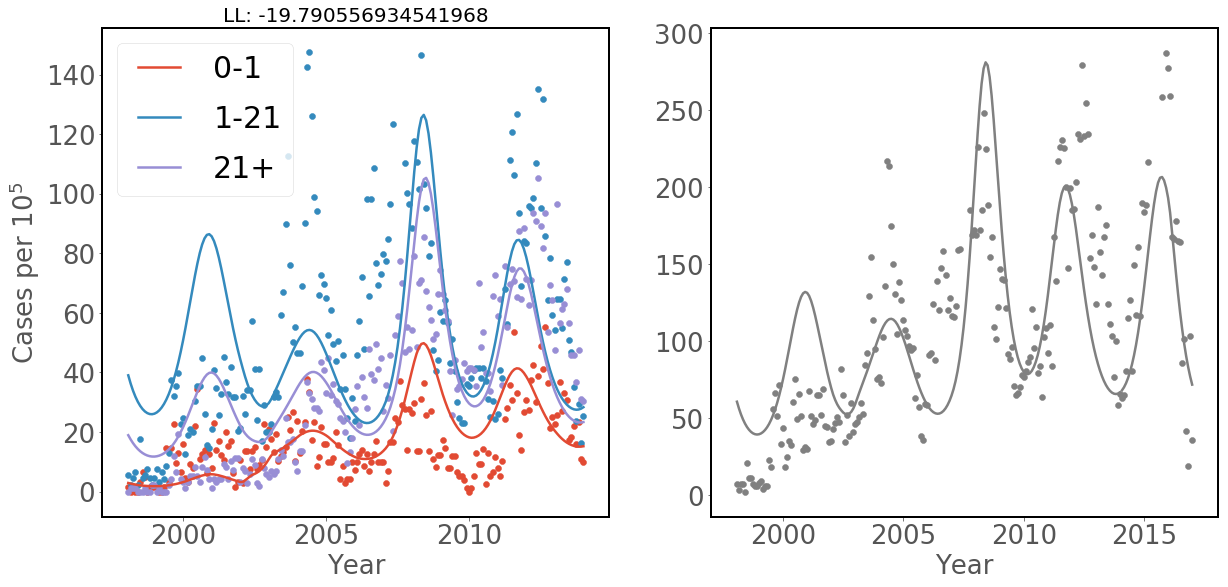

In [110]:
mle, mle_place, min_le = mle_values(mcmc, True)
print (mle, mle_place)
best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
g = mcmc['initial_guess']
g[mcmc['active_params']] = best_vals
print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
# zb, _ = run_model(mcmc['state_0'],mcmc['start'],mcmc['end'],*g)
zb = mcmc['y_hat_M'][mle_place-1,:,:]
zb2 = mcmc['y2_hat_M'][mle_place-1,:]
print ((bvals), log_liklihood(zb, mcmc['datay1'], mcmc['sigma']))
###### Draw Figure 4####
fig, axs = plt.subplots(1, 2, figsize=(20, 9))
labels = ['0-1', '1-21', '21+']

ax = axs[0]
for i, l in enumerate(labels):
#     if i ==1:
#         continue
    ax.plot(mcmc['datax1'], zb[i, :], label=l, color='C{}'.format(i))
#     ax.scatter(mcmc['datax1'][mcmc['datay1'][i,:]<150], mcmc['datay1'][i, :][mcmc['datay1'][i,:]<150], color='C{}'.format(i))
    ax.scatter(mcmc['datax1'], plot_data[i, :], color='C{}'.format(i))
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datay1'], mcmc['sigma'])))

ax = axs[1]
ax.plot(mcmc['datax1'], zb.sum(axis=0), color='grey')
ax.plot(mcmc['datax2'], zb2, color='grey')
# ax.plot(mcmc['datay'], zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(mcmc['datax1'], plot_data.sum(axis=0), c='grey')
ax.scatter(mcmc['datax2'],plot_data2, c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

## C Cloud

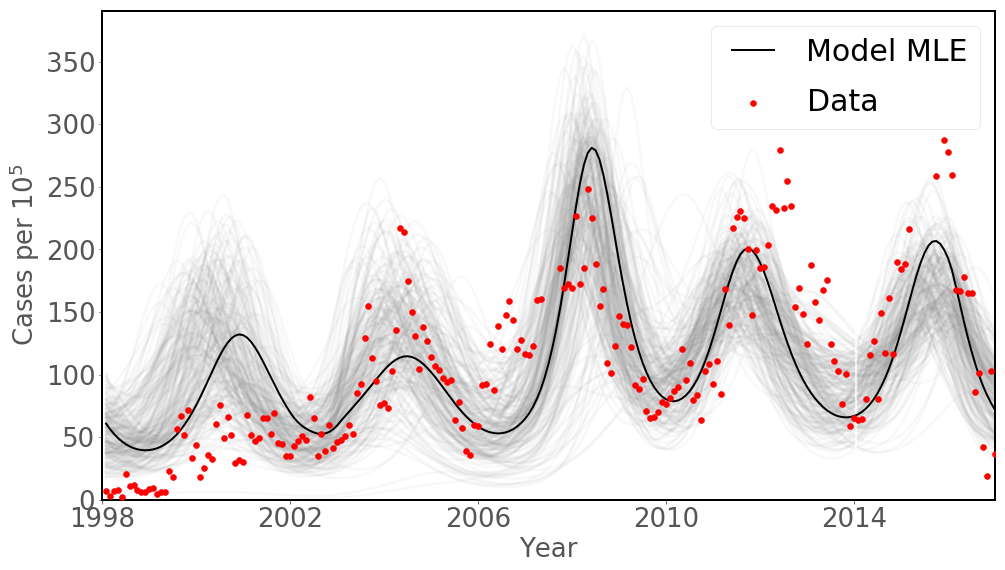

In [111]:
plt.style.use('dean_style.conf')
label_font = {'fontsize':24}
tick_font = {'fontsize':20}
fig, axs = plt.subplots(1, figsize=(16, 9))
ax = axs
# from_place = mle_place
# print (from_place)
l = 1
k = 1
for curr_model,curr_model2 in zip(sampled[l::k],sampled2[l::k]):

    ax.plot(mcmc['datax1'], curr_model.sum(axis=0), color='grey', alpha=0.0501)
    ax.plot(mcmc['datax2'], curr_model2, color='grey', alpha=0.0501)
    
ax.scatter(mcmc['datax1'], plot_data.sum(axis=0), c='red', zorder=5, label="Data")
ax.scatter(mcmc['datax2'], plot_data2, c='red', zorder=5)

ax.set_ylabel("Cases per $10^5$")#, fontdict=label_font)
ax.set_xlabel("Year")#, fontdict=label_font)
ax.set_xticks(np.arange(1998,2017,4))
ax.set_xlim(1998,2017)
ax.set_ylim(bottom=0)
ax.tick_params(axis='both', which='major')#, labelsize=20)
# ax.plot(mcmc['datax1'], zb.sum(axis=0), color='k', lw=2, label='Model MLE')
# ax.plot(mcmc['datax2'], zb2, color='k', lw=2, label='Model MLE')
ax.plot(xdata, np.append(zb.sum(axis=0),zb2), color='k', lw=2, label='Model MLE')
# lims = ax.get_ylim()
# ax.vlines(2014,*lims)
# ax.set_ylim(*lims)
# print (mle / len(mcmc['datax1']))
# print ((((zb - mcmc['datay'])**2).sum())**0.5)


ax.legend()
plt.show()

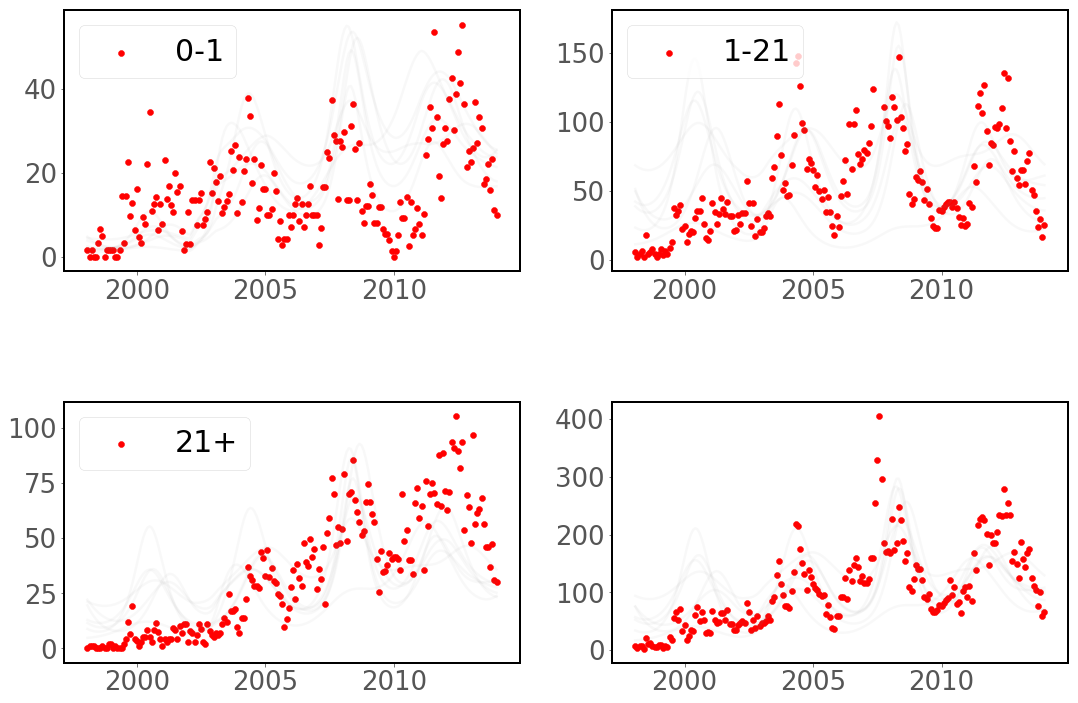

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
# from_place = mle_place
for j in sampled[::10]:
    curr_model = j#mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.plot(mcmc['datax1'], curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.plot(mcmc['datax1'], curr_model.sum(axis=0), color='grey', alpha=0.05)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.scatter(mcmc['datax1'], plot_data[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.scatter(mcmc['datax1'], mcmc['datay1'].sum(axis=0), c='red')
plt.show()

## D Bars

In [86]:
mcmc['ll']

array([[             -inf,  -27.751503044957],
       [ -23.921983152003,              -inf],
       [ -23.921983152003,              -inf],
       [ -23.921983152003, -650.185315537551],
       [ -23.921983152003,              -inf],
       [ -23.921983152003, -477.874542833601],
       [ -23.921983152003,              -inf],
       [ -23.921983152003,              -inf],
       [ -23.921983152003,              -inf],
       [ -23.921983152003,              -inf],
       ..., 
       [ -23.613771960393,  -28.358407807044],
       [ -23.613771960393,  -22.948658405553],
       [ -22.948658405553,  -24.091952387033],
       [ -22.948658405553,  -24.899138316117],
       [ -22.948658405553,  -22.257222642133],
       [ -22.257222642133,  -21.587239636641],
       [ -21.587239636641,  -25.805491343913],
       [ -21.587239636641,  -24.946100769672],
       [ -21.587239636641,  -21.484030153243],
       [ -21.484030153243,  -24.106595545463]])

In [114]:
# for j in np.arange(-5000,-1,100):
med = np.median(mcmc['y_hat_M'][2000::thinnig,:,:].sum(axis=2), axis=0)
N = med.sum()
med /= N
med


qs = sampled.sum(axis=2)
qs = (mquantiles(qs, axis=0,prob=[0.25,0.75])/N).data
print(med)
print(qs)

[ 0.162555507945  0.517464961666  0.319979530389]
[[ 0.131611545879  0.435517703058  0.244481284829]
 [ 0.189580783671  0.629047973187  0.380935593373]]


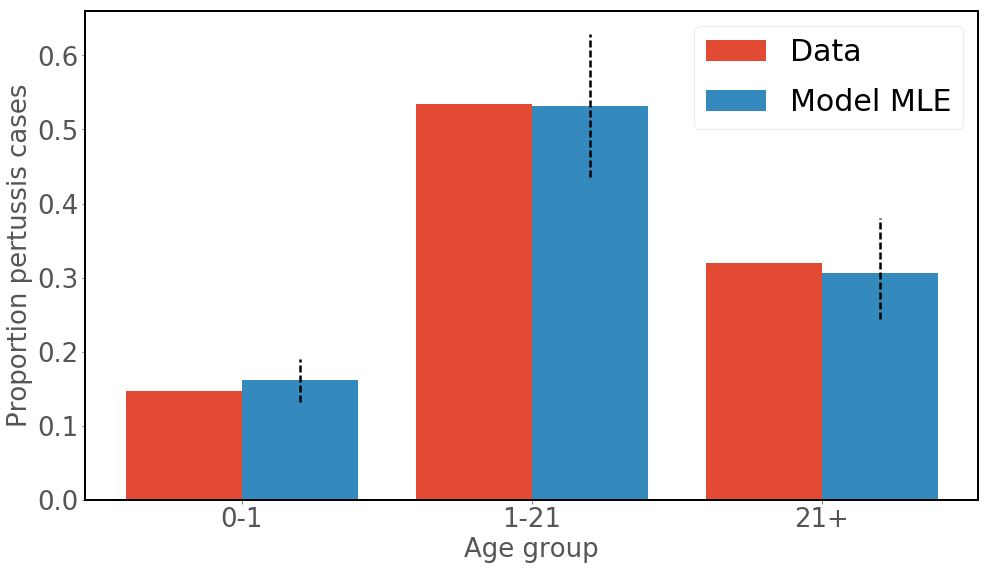

In [115]:
plt.style.use('dean_style.conf')
data_age_dist = mcmc['datay1'].sum(axis=1)
data_age_dist /= data_age_dist.sum()

y_age_dist = mcmc['y_hat_M'][mle_place,:,:].sum(axis=1)
y_age_dist /= y_age_dist.sum()

x = np.arange(len(data_age_dist))
fig, ax = plt.subplots(figsize=(16,9))
# https://matplotlib.org/2.0.0/examples/api/barchart_demo.html
width = 0.4
ax.bar(x,data_age_dist, width, label="Data")
# ax.bar(x+width, med, width, label="Model 90% HDI")
ax.vlines(x+width, qs[0,:], qs[1,:],linestyles='--')
ax.bar(x+width, y_age_dist, width, label="Model MLE")
ax.set_xticks(np.arange(3) + width/2)
ax.set_xticklabels(labels)
ax.set_xlabel('Age group')
ax.set_ylabel('Proportion pertussis cases')
ax.legend()
#ADD Axis labels

## Likelihood Cloud

In [18]:
plot_data = mcmc['datax'].copy()
plot_data[mcmc['datax'] > 150] = np.nan

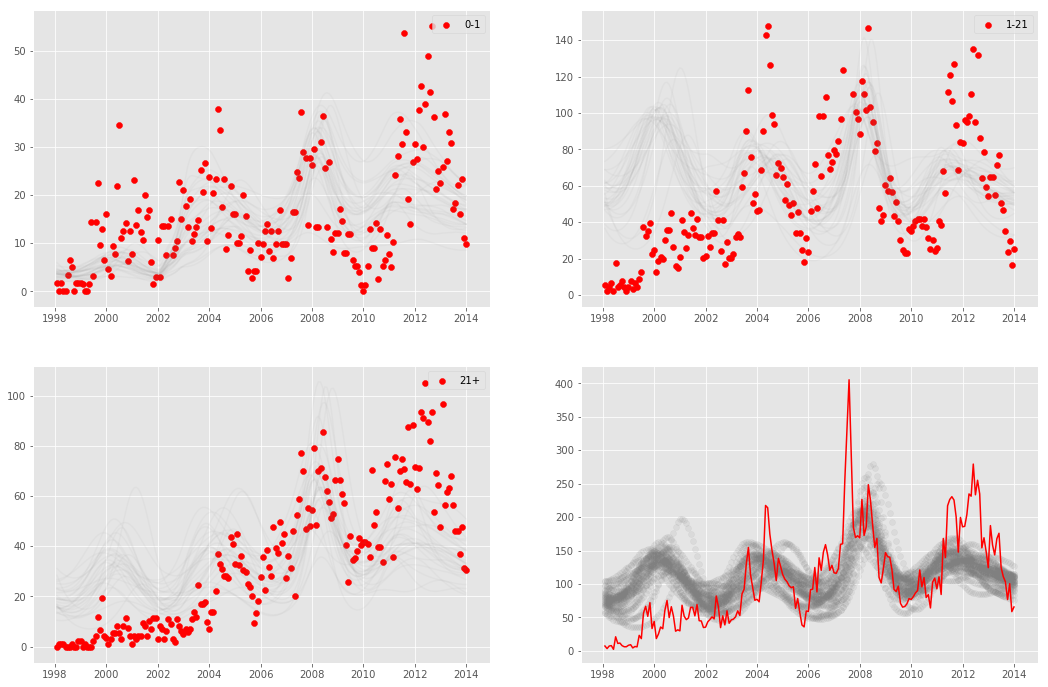

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
from_place = mle_place
for j in np.arange(-2000, 0, 20):
    chain_place = j #from_place + j
    if mcmc['accepted'][chain_place] == 0: continue
    curr_model = mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.plot(mcmc['datay'], curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.scatter(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.10511)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.scatter(mcmc['datay'], plot_data[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.plot(mcmc['datay'], mcmc['datax'].sum(axis=0), c='red')
plt.show()

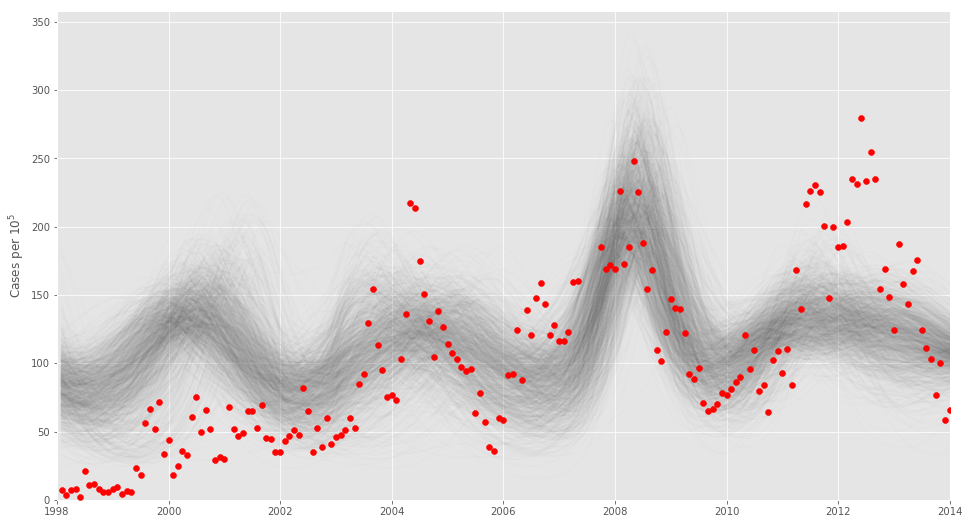

In [46]:
fig, axs = plt.subplots(1, figsize=(16, 9))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
for j in np.arange(-600,600):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

# Likelihood Analysis
See a chart of to lines for two models, with data scatterd

In [244]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=6)

## MLE Comparison

-19.5458591715 35842
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978]
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978]
[  3.9805           1.725391842174  60.               0.000772012353   0.000330903533   0.000055624978]
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978] -19.5458591715


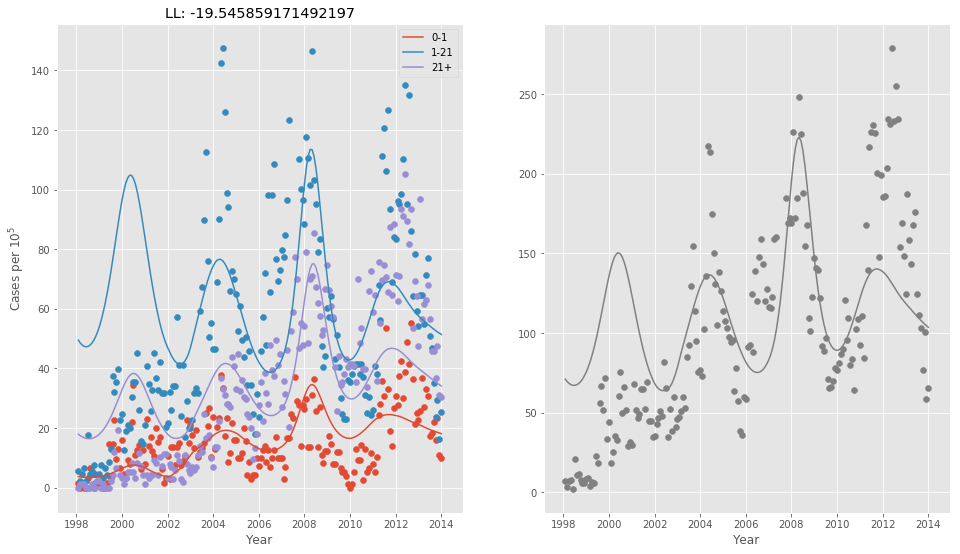

In [31]:
mle, mle_place, min_le = mle_values(mcmc, True)
print (mle, mle_place)
best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
g = mcmc['initial_guess']
g[mcmc['active_params']] = best_vals
print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
# zb, _ = run_model(mcmc['state_0'],mcmc['start'],mcmc['end'],*g)
zb = mcmc['y_hat_M'][mle_place-1,:,:]
print ((bvals), log_liklihood(zb, mcmc['datax'], mcmc['sigma']))
###### Draw Figure 4####
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(mcmc['datay'], zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(mcmc['datay'][mcmc['datax'][i,:]<150], mcmc['datax'][i, :][mcmc['datax'][i,:]<150])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datax'], mcmc['sigma'])))
ax = axs[1]
ax.plot(mcmc['datay'], zb.sum(axis=0), color='grey')
# ax.plot(mcmc['datay'], zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(mcmc['datay'][sl150], mcmc['datax'].sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

## Cloud old version

1718


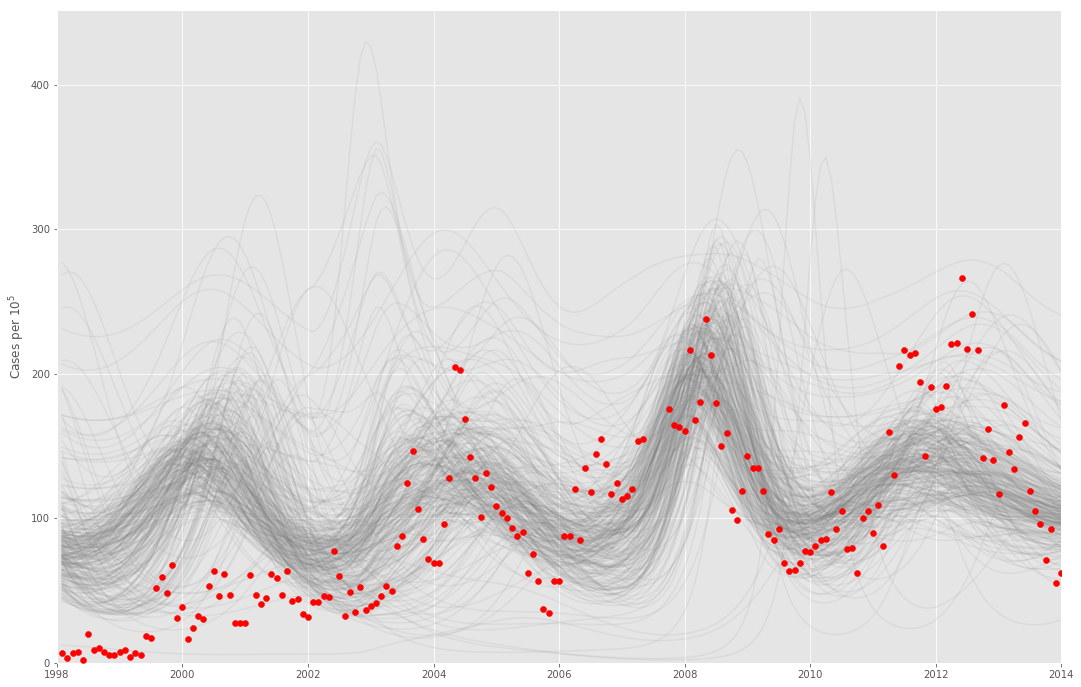

In [307]:
fig, axs = plt.subplots(1, figsize=(18, 12))
from_place = mle_place
print (from_place)
for j in np.arange(-1000,len(mcmc['chain']) - mle_place,5):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.1)
ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

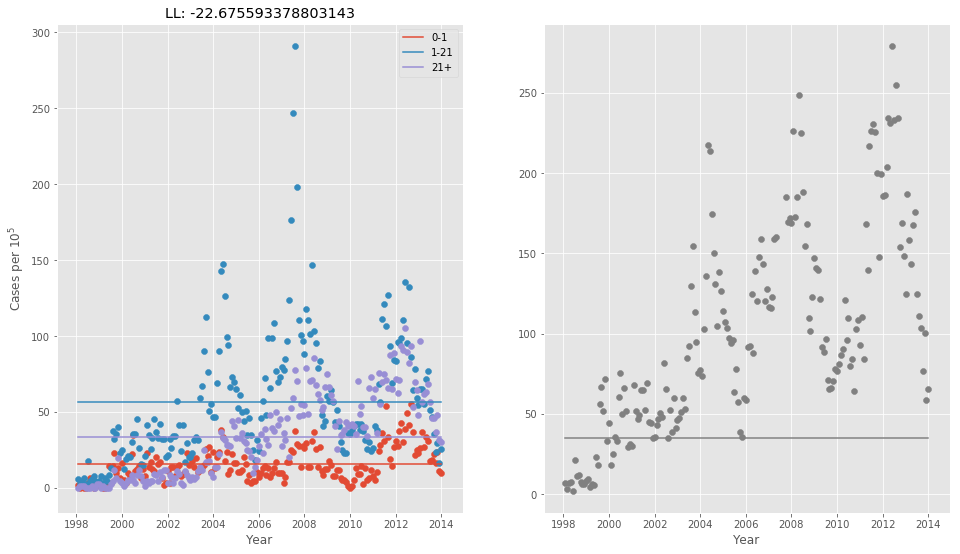

In [32]:
t1 = mcmc['datax'].mean(axis=1)
zb = np.repeat(t1, 192,axis=0).reshape(3,192)
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(mcmc['datay'], zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(mcmc['datay'], mcmc['datax'][i, :])
ax.legend()
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datax'], mcmc['sigma'])))
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax = axs[1]
ax.plot(mcmc['datay'], zb.mean(axis=0), color='grey')
ax.scatter(mcmc['datay'][sl150], mcmc['datax'].sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()